In [14]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gpn.model
import seaborn as sns
from sklearn.decomposition import PCA
from transformers import AutoModelForSequenceClassification
from umap import UMAP

In [2]:
# model_path = "../../results/checkpoints_expression/sorghum_bicolor/2048/v1/checkpoint-120000/v2"
# model_path = "../../results/checkpoints_expression/sorghum_rice/1024/1024/GPN_Brassicales/default/42"
# model_path = "../../results/checkpoints_expression/sorghum_maize/1024/1024/GPN_Brassicales/v1/42"
# model_path = "../../results/checkpoints_expression/sorghum/1024/1024/GPN_Brassicales/default/42"
# model_path = "../../results/checkpoints_expression/sorghum_rice_barley/1024/1024/GPN_Brassicales/default/42"
# model_path = "../../results/checkpoints/GPN_Brassicales/20_epochs/42"
model_path = (
    "../../results/checkpoints_epoch/GPN_Brassicales/30_epochs/42/checkpoint-1855"
)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [3]:
final_layer = model.classifier.out_proj.weight.detach().numpy()
final_layer_cols = [f"last_layer_{i}" for i in range(final_layer.shape[1])]
final_layer.shape

(26, 512)

In [4]:
df = pd.read_csv(
    "hf://datasets/gonzalobenegas/gxa-sorghum-v1/labels.txt",
    header=None,
    names=["track"],
)
df["study"] = df.track.str.split("_").str[0]
df["experiment"] = df.track.str.split("_").str[1]
df[final_layer_cols] = final_layer
df

/tmp/ipykernel_3625443/1810423583.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[final_layer_cols] = final_layer
/tmp/ipykernel_3625443/1810423583.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[final_layer_cols] = final_layer
/tmp/ipykernel_3625443/1810423583.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

,track,study,experiment,last_layer_0,last_layer_1,last_layer_2,last_layer_3,last_layer_4,last_layer_5,last_layer_6,...,last_layer_502,last_layer_503,last_layer_504,last_layer_505,last_layer_506,last_layer_507,last_layer_508,last_layer_509,last_layer_510,last_layer_511
0,E-MTAB-4021_bundle sheath,E-MTAB-4021,bundle sheath,0.009134,-0.040247,-0.003230,0.008010,-0.005810,-0.009001,0.033378,...,-0.011895,0.052975,0.008876,-0.023477,-0.044184,-0.034161,0.023304,0.020849,0.006089,-0.004418
1,E-MTAB-4021_leaf mesophyll,E-MTAB-4021,leaf mesophyll,-0.012074,0.007437,-0.003080,0.010643,0.029589,0.036757,-0.038885,...,-0.040663,0.001067,0.002446,-0.017614,-0.037804,-0.028999,0.017145,-0.011633,-0.028370,-0.026760
2,E-GEOD-98817_stem internode region 1,E-GEOD-98817,stem internode region 1,-0.016920,-0.029990,-0.036391,0.009582,-0.005398,0.027403,-0.016138,...,-0.004427,-0.034326,0.021614,-0.019335,-0.021335,-0.005758,0.027958,0.000086,-0.035691,-0.016721
3,E-GEOD-98817_stem internode region 2,E-GEOD-98817,stem internode region 2,0.014649,0.008869,-0.009913,0.002311,-0.016868,0.008276,-0.003916,...,-0.041697,-0.045603,0.006000,-0.019836,-0.007380,0.031953,0.040448,0.005349,-0.012594,-0.012120
4,E-GEOD-98817_stem internode region 3,E-GEOD-98817,stem internode region 3,0.010728,-0.008784,-0.002573,0.012601,0.002613,-0.013091,-0.015098,...,-0.004474,0.002542,-0.005575,-0.028758,-0.001665,0.002433,0.022516,0.000346,-0.031524,0.001636
5,E-GEOD-98817_stem internode region 4,E-GEOD-98817,stem internode region 4,0.005333,-0.028856,-0.030148,-0.005411,0.019585,0.002918,-0.014541,...,0.000273,-0.016576,0.000142,-0.031505,-0.025629,-0.006087,0.038459,-0.011586,-0.013070,0.001308
6,E-MTAB-4203_flag leaf,E-MTAB-4203,flag leaf,0.010268,-0.005815,-0.041026,-0.051315,-0.026338,0.006909,0.002482,...,-0.009411,0.001873,0.012767,-0.022989,-0.033847,0.005673,0.011202,-0.003134,0.020601,-0.013273
7,E-MTAB-4203_inflorescence,E-MTAB-4203,inflorescence,0.002877,0.020029,-0.032117,-0.030343,-0.023371,-0.005538,0.006893,...,0.018324,-0.007804,0.005301,-0.031125,-0.015354,0.012172,-0.005370,-0.010160,0.022860,0.004672
8,E-MTAB-4273_seed,E-MTAB-4273,seed,-0.000608,-0.027358,-0.042143,0.069664,0.000577,-0.018059,-0.006283,...,-0.007677,-0.051384,0.040325,-0.026617,-0.012373,0.015397,0.008623,0.034716,-0.021790,-0.022539
9,E-MTAB-4273_spikelet,E-MTAB-4273,spikelet,0.029906,-0.007268,-0.035491,-0.011040,0.030821,0.019722,-0.019386,...,-0.006859,-0.017802,0.002602,-0.027666,-0.009362,0.018733,-0.010817,0.003451,0.010548,0.014243


In [5]:
# TODO: add standardization as a pipeline?
# maybe start with PCA rather than UMAP since number of points is small
df[["PC1", "PC2"]] = PCA(n_components=2, random_state=42).fit_transform(
    df[final_layer_cols]
)
df[["UMAP1", "UMAP2"]] = UMAP(n_components=2, random_state=42).fit_transform(
    df[final_layer_cols]
)

/tmp/ipykernel_3625443/110807364.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[["PC1", "PC2"]] = PCA(n_components=2, random_state=42).fit_transform(df[final_layer_cols])
/tmp/ipykernel_3625443/110807364.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[["PC1", "PC2"]] = PCA(n_components=2, random_state=42).fit_transform(df[final_layer_cols])
/tmp/ipykernel_3625443/110807364.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

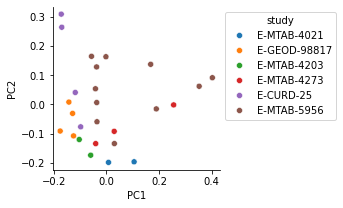

In [6]:
plt.figure(figsize=(3, 3))
g = sns.scatterplot(data=df, x="PC1", y="PC2", hue="study")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
sns.despine();

In [19]:
def plot(x, y):
    plt.figure(figsize=(10, 10))
    g = sns.scatterplot(data=df, x=x, y=y, s=100, hue="study")
    texts = []
    for i, row in df.iterrows():
        texts.append(plt.text(row[x], row[y], str(row["experiment"])))
    adjust_text(texts)
    sns.despine()

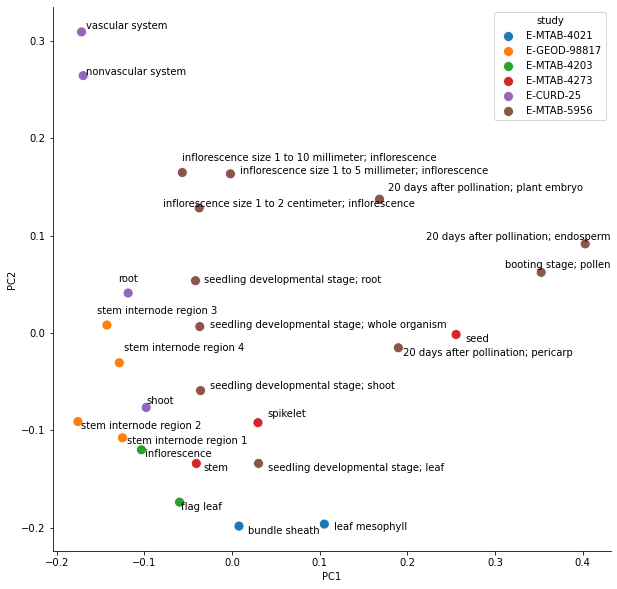

In [20]:
plot("PC1", "PC2")

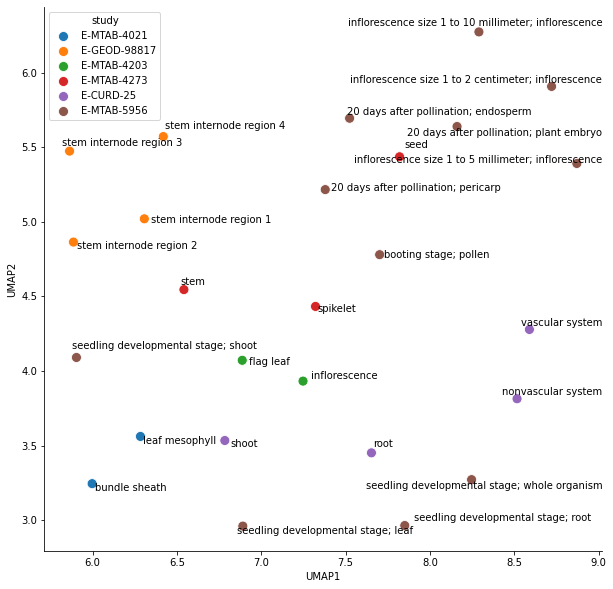

In [21]:
plot("UMAP1", "UMAP2")

# Based on expression matrix

In [10]:
expression = (
    pd.read_parquet(
        "/accounts/projects/yss/gbenegas/projects/gpn/workflow/make_expression_dataset_from_gxa/results/gxa/merged_tss_expression_group.parquet"
    )
    .drop(columns=["chrom", "pos", "strand"])
    .T
)
expression

,0,1,2,3,4,5,6,7,8,9,...,40692,40693,40694,40695,40696,40697,40698,40699,40700,40701
E-MTAB-4021_bundle sheath,0.000000,11.333333,1.333333,1.233333,0.900000,0.433333,10.666667,0.166667,20.333333,0.000000,...,0.000000,17.666667,0.000000,3.666667,0.000000,2.333333,0.000000,16.333333,4.000000,0.000000
E-MTAB-4021_leaf mesophyll,0.000000,10.333333,0.000000,0.233333,0.000000,0.000000,0.666667,0.133333,6.666667,0.000000,...,0.000000,8.333333,0.000000,0.300000,0.000000,1.933333,0.000000,14.333333,2.533333,0.000000
E-GEOD-98817_stem internode region 1,0.100000,50.333333,24.000000,0.000000,1.500000,6.566667,0.000000,0.000000,42.333333,1.633333,...,0.000000,75.000000,1.666667,0.633333,0.700000,12.533333,0.066667,31.000000,17.333333,0.000000
E-GEOD-98817_stem internode region 2,0.633333,63.000000,22.666667,1.333333,4.333333,10.966667,0.300000,0.000000,40.333333,1.733333,...,0.000000,98.333333,6.666667,0.866667,0.300000,18.800000,0.133333,45.333333,20.666667,0.000000
E-GEOD-98817_stem internode region 3,1.966667,39.666667,22.000000,4.333333,6.000000,13.366667,1.933333,0.000000,35.666667,1.666667,...,0.100000,97.333333,5.000000,0.500000,0.733333,14.633333,0.433333,50.333333,26.666667,0.033333
E-GEOD-98817_stem internode region 4,1.666667,33.333333,21.000000,9.000000,6.000000,14.666667,0.266667,0.000000,27.333333,1.333333,...,0.100000,100.666667,5.666667,0.466667,0.800000,20.000000,0.200000,55.000000,30.000000,0.066667
E-MTAB-4203_flag leaf,0.000000,33.000000,0.100000,6.500000,1.000000,7.500000,0.000000,0.250000,21.000000,0.500000,...,0.000000,42.000000,2.150000,0.650000,25.000000,21.300000,0.000000,55.000000,11.000000,0.050000
E-MTAB-4203_inflorescence,0.200000,51.500000,0.250000,15.000000,2.400000,12.000000,2.500000,0.200000,34.000000,2.250000,...,1.000000,48.500000,3.500000,0.600000,32.500000,32.800000,0.000000,69.000000,18.000000,0.000000
E-MTAB-4273_seed,0.000000,17.000000,0.200000,1.666667,0.600000,1.500000,0.000000,0.400000,9.000000,0.066667,...,0.100000,26.666667,1.600000,0.033333,2.000000,6.933333,0.033333,21.666667,8.666667,0.000000
E-MTAB-4273_spikelet,0.100000,34.333333,0.066667,8.000000,2.066667,7.566667,0.000000,0.133333,32.666667,0.833333,...,0.200000,43.333333,2.300000,0.000000,4.333333,28.600000,0.066667,68.333333,31.333333,18.666667


In [13]:
assert (df.track == expression.index).all()

In [15]:
df[["exp_PC1", "exp_PC2"]] = PCA(n_components=2, random_state=42).fit_transform(
    np.log1p(expression.values)
)

/tmp/ipykernel_3625443/3867518521.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[["exp_PC1", "exp_PC2"]] = PCA(n_components=2, random_state=42).fit_transform(np.log1p(expression.values))
/tmp/ipykernel_3625443/3867518521.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[["exp_PC1", "exp_PC2"]] = PCA(n_components=2, random_state=42).fit_transform(np.log1p(expression.values))


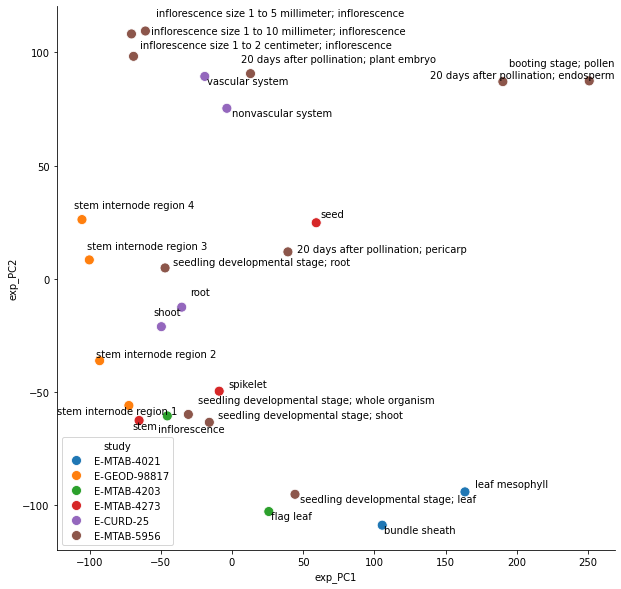

In [22]:
plot("exp_PC1", "exp_PC2")